In [11]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [12]:
n = 3.5          # index of square grating
a = 1.2            # period 
d = 0.5*a            # side of square
t = 0.6          # thickness of grating
dpml = 1         # PML thickness
pad = 1          # padding between grating and PML

res = 50         # pixels/μm
pol = mp.Ex     # polarization

In [13]:
gel = mp.Medium(index=1)
block = mp.Block(mp.Vector3(d,t), center=mp.Vector3(0,0), material=mp.Medium(index=n))

In [14]:
w_min = 0.5
w_max = 1.5
f_max = 1/w_min
f_min = 1/w_max

fcen = 0.5*(f_min+f_max)
df = (f_max-f_min)/2
nfreqs = 50

src = mp.Source(mp.GaussianSource(fcen, fwidth=df), pol, center=mp.Vector3(y=-t/2-pad+0.1), size=mp.Vector3(a))

In [15]:
block = mp.Block(mp.Vector3(d, t), center=mp.Vector3(), material=mp.Medium(index=n))
src = mp.Source(mp.GaussianSource(fcen, fwidth=df), component=pol, center=mp.Vector3(y=-t/2-pad+0.2), size=mp.Vector3(a))
cell = mp.Vector3(a, 2*dpml+2*pad+t)
pml_layers = [mp.PML(dpml, direction=mp.Y)]

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    sources=[src],
                    resolution=res,
                    default_material=mp.Medium(index=1),
                    geometry=[block],
                    k_point=mp.Vector3())

# Add monitors
refl = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=-t/2-pad+0.1), size=mp.Vector3(a)))
tran = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=t/2+pad-0.1), size=mp.Vector3(a)))

     block, center = (0,0,0)
          size (0.6,1.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)


<AxesSubplot:xlabel='X', ylabel='Y'>

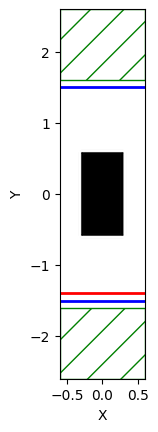

In [16]:
sim.plot2D()

In [17]:
# Run the simulation
sim.run(until_after_sources=mp.stop_when_fields_decayed(100, mp.Ez, mp.Vector3(y=t/2+pad-0.1), 1e-7))

-----------
Initializing structure...
time for choose_chunkdivision = 6.07967e-05 s
Working in 2D dimensions.
Computational cell is 1.2 x 5.2 x 0 with resolution 50
     block, center = (0,0,0)
          size (0.6,1.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)
time for set_epsilon = 0.0225451 s
-----------
run 0 finished at t = 100.01 (10001 timesteps)


In [18]:
# Get eigenmode data
p1_coeff = sim.get_eigenmode_coefficients(refl, [1]).alpha[0]
p2_coeff = sim.get_eigenmode_coefficients(tran, [1]).alpha[0]

c1 = np.array([coef[1] for coef in p1_coeff])
c2 = np.array([coef[0] for coef in p2_coeff])
c3 = np.array([coef[0] for coef in p1_coeff])

MPB solved for frequency_1(0,1,0) = 1 after 11 iters
Dominant planewave for band 1: (0.000000,1.000000,0.000000)
MPB solved for frequency_1(0,1.01361,0) = 1.01361 after 11 iters
Dominant planewave for band 1: (0.000000,1.013605,0.000000)
MPB solved for frequency_1(0,1.02721,0) = 1.02721 after 11 iters
Dominant planewave for band 1: (0.000000,1.027211,0.000000)
MPB solved for frequency_1(0,1.04082,0) = 1.04082 after 11 iters
Dominant planewave for band 1: (0.000000,1.040816,0.000000)
MPB solved for frequency_1(0,1.05442,0) = 1.05442 after 11 iters
Dominant planewave for band 1: (0.000000,1.054422,0.000000)
MPB solved for frequency_1(0,1.06803,0) = 1.06803 after 11 iters
Dominant planewave for band 1: (0.000000,1.068027,0.000000)
MPB solved for frequency_1(0,1.08163,0) = 1.08163 after 11 iters
Dominant planewave for band 1: (0.000000,1.081633,0.000000)
MPB solved for frequency_1(0,1.09524,0) = 1.09524 after 11 iters
Dominant planewave for band 1: (0.000000,1.095238,0.000000)
MPB solved f

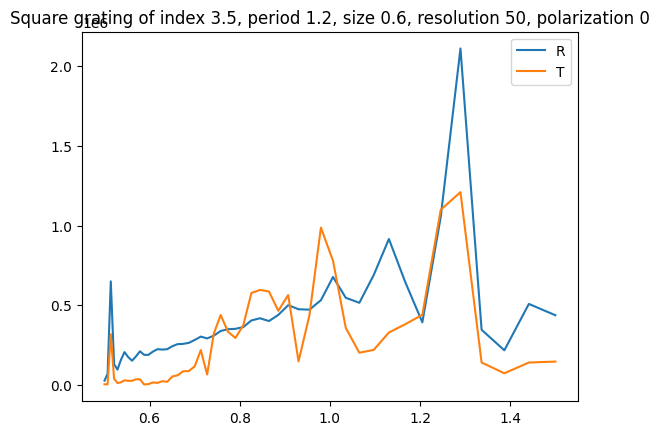

In [19]:
freqs = np.linspace(fcen-df, fcen+df, nfreqs)
wl = 1/freqs
R = np.abs(c1)**2 / np.abs(c3)**2
T = np.abs(c2)**2 / np.abs(c3)**2
plt.plot(wl, R, label='R')
plt.plot(wl, T, label='T')
plt.title('Square grating of index {}, period {}, size {}, resolution {}, polarization {}'.format(n, a, d, sim.resolution, pol))
plt.legend()
title = 'square_grating_{}_{}_{}_{}_{}.png'.format(n, a, d, sim.resolution, pol)
# plt.savefig('results/'+title+'.png')

     block, center = (0,0,0)
          size (0.6,1.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)


<AxesSubplot:xlabel='X', ylabel='Y'>

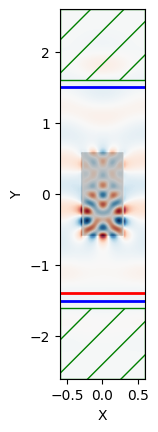

In [20]:
sim.plot2D(fields=pol)